In [1]:
import gymnasium as gym
print(gym.__version__)

0.26.1


## Cartpole

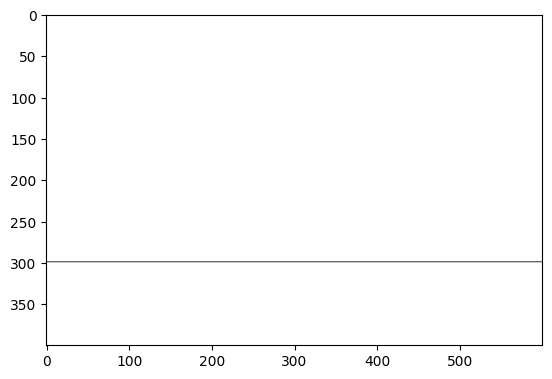

[-4.4627833 -9.169975   5.046544   2.3686776]


In [3]:
import gymnasium as gym
import matplotlib.pyplot as plt
import cv2
from IPython import display

env = gym.make('CartPole-v1', render_mode='rgb_array')

observation = env.reset()
print(f"observation = {observation}")

for _ in range(50):
    rgb_array = env.render()
    plt.imshow(rgb_array)
    display.clear_output(wait = True)
    display.display(plt.gcf())
    observation, reward, terminated, truncated, info = env.step(0)
    print(observation)
plt.close()
env.close()

## Cartpole eazy algorithm

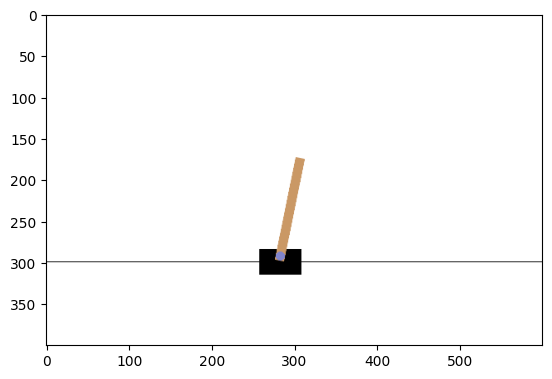

[-0.14361162 -0.23302174  0.21363914  0.37579438] True
39


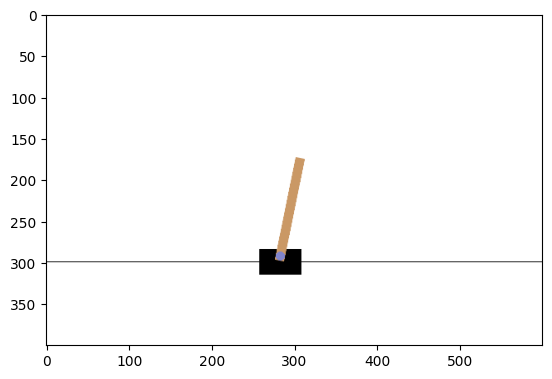

In [4]:
import gymnasium as gym
import matplotlib.pyplot as plt
import cv2
from IPython import display

env = gym.make('CartPole-v1', render_mode='rgb_array')
observation, info = env.reset(seed=17)

for i in range(1, 40):
    rgb_array = env.render()
    # if 막대기가 오른쪽으로 기울어져 있다면: 오른쪽으로 힘을 가함
    # else: 왼쪽으로 힘을 가함

    # Eazy Control
    if observation[2] > 0:
        action = 1
    else: action = 0
    
    plt.imshow(rgb_array)
    display.clear_output(wait = True)
    display.display(plt.gcf())

    observation, reward, terminated, truncated, info = env.step(action)
    print(observation, terminated)
    if terminated:
        print(i)
        break
env.close()

## Neural Network Cartpole

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import cv2
from IPython import display

env = gym.make('CartPole-v1', render_mode='rgb_array')
observation, info = env.reset(seed=17)

for step_index in range(1000):
    rgb_array = env.render()
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    print(f"Step {step_index}")
    print(f"action: {action}")
    print(f"observation: {observation}")
    print(f"reward: {reward}")
    print(f"terminated: {terminated}")
    print(f"info: {info}")
    print(f"truncated: {truncated}")
    print("-"*80)
    if terminated:
        break

Step 0
action: 1
observation: [ 0.03382942  0.16113597  0.00551061 -0.30404744]
reward: 1.0
terminated: False
info: {}
truncated: False
--------------------------------------------------------------------------------
Step 1
action: 0
observation: [ 0.03705214 -0.03406408 -0.00057033 -0.0096317 ]
reward: 1.0
terminated: False
info: {}
truncated: False
--------------------------------------------------------------------------------
Step 2
action: 0
observation: [ 0.03637086 -0.22917785 -0.00076297  0.28287122]
reward: 1.0
terminated: False
info: {}
truncated: False
--------------------------------------------------------------------------------
Step 3
action: 0
observation: [ 0.03178731 -0.4242889   0.00489446  0.5753134 ]
reward: 1.0
terminated: False
info: {}
truncated: False
--------------------------------------------------------------------------------
Step 4
action: 0
observation: [ 0.02330153 -0.6194791   0.01640072  0.8695342 ]
reward: 1.0
terminated: False
info: {}
truncated: Fa

https://github.com/SaravananJaichandar/CartPole-Balancing-using-Neural-Network/tree/master

In [2]:
import random
import numpy as np
import gymnasium as gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

2023-07-31 15:48:46.089559: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [4]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
env.reset(seed=17)

goal_steps = 500
score_requirement = 60
initial_games = 5000

In [5]:
def model_data_preparation():
    training_data = []
    accepted_scores = []
    for game_index in range(initial_games):
        score = 0
        game_memory = []
        previous_observation = []
        for step_index in range(goal_steps):
            action = random.randrange(0, 2)
            observation, reward, terminated, truncated, info = env.step(action)
            
            if len(previous_observation) > 0:
                game_memory.append([previous_observation, action])
                
            previous_observation = observation
            score += reward
            if terminated:
                break
            
        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:
                if data[1] == 1:
                    output = [0, 1]
                elif data[1] == 0:
                    output = [1, 0]
                training_data.append([data[0], output])
        
        env.reset()

    print(accepted_scores)
    
    return training_data

In [6]:
training_data = model_data_preparation()

[73.0, 60.0, 63.0, 89.0, 60.0, 61.0, 61.0, 78.0, 66.0, 67.0, 65.0, 62.0, 62.0, 77.0, 62.0, 62.0, 69.0, 66.0, 81.0, 83.0, 71.0, 82.0, 69.0, 65.0, 92.0, 62.0, 80.0, 61.0, 64.0, 61.0, 95.0, 72.0, 114.0, 75.0, 76.0, 65.0, 74.0, 61.0, 63.0, 62.0, 62.0, 72.0, 75.0, 60.0, 61.0, 62.0, 85.0, 65.0, 64.0, 65.0, 66.0, 62.0, 67.0, 70.0, 78.0, 78.0, 61.0, 82.0, 61.0, 63.0, 70.0, 85.0, 84.0, 60.0, 63.0, 68.0, 77.0, 78.0, 80.0, 63.0, 62.0, 61.0, 71.0, 69.0, 93.0, 70.0, 62.0, 63.0, 77.0, 99.0, 60.0, 75.0, 61.0, 78.0, 62.0, 81.0, 63.0, 76.0, 62.0]


In [7]:
def build_model(input_size, output_size):
    model = Sequential()
    model.add(Dense(128, input_dim=input_size, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_size, activation='linear'))
    model.compile(loss='mse', optimizer=Adam())

    return model

In [8]:
def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    print(X)
    print(y)
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=10)
    return model

In [10]:
trained_model = train_model(training_data)

[[-0.04865715 -0.21355955 -0.03317754  0.2664406 ]
 [-0.05292834 -0.01798018 -0.02784873 -0.03651942]
 [-0.05328795  0.17752983 -0.02857912 -0.3378572 ]
 ...
 [-0.19422305 -0.5910255   0.14781487  1.0288516 ]
 [-0.20604356 -0.78777224  0.1683919   1.364053  ]
 [-0.221799   -0.9845551   0.19567296  1.7043258 ]]
[[0 1]
 [0 1]
 [0 1]
 ...
 [1 0]
 [1 0]
 [0 1]]
Epoch 1/10


2023-07-31 15:49:51.049431: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-31 15:49:51.050045: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-07-31 15:49:51.079886: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-31 15:49:51.080170: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Laptop GPU computeCapability: 8.6
coreClock: 1.5GHz coreCount: 16 deviceMemorySize: 3.82GiB deviceMemoryBandwidth: 174.97GiB/s
2023-07-31 15:49:51.080203: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-07-31 15:49:51.123607: I tensorflow/stream_executor/pl

193/193 [==============================] - 0s 619us/step - loss: 0.2821
Epoch 2/10
193/193 [==============================] - 0s 535us/step - loss: 0.2354
Epoch 3/10
193/193 [==============================] - 0s 571us/step - loss: 0.2316
Epoch 4/10
193/193 [==============================] - 0s 567us/step - loss: 0.2308
Epoch 5/10
193/193 [==============================] - 0s 583us/step - loss: 0.2333
Epoch 6/10
193/193 [==============================] - 0s 529us/step - loss: 0.2293
Epoch 7/10
193/193 [==============================] - 0s 519us/step - loss: 0.2325
Epoch 8/10
193/193 [==============================] - 0s 570us/step - loss: 0.2320
Epoch 9/10
193/193 [==============================] - 0s 491us/step - loss: 0.2314
Epoch 10/10
193/193 [==============================] - 0s 619us/step - loss: 0.2278


KeyboardInterrupt: 

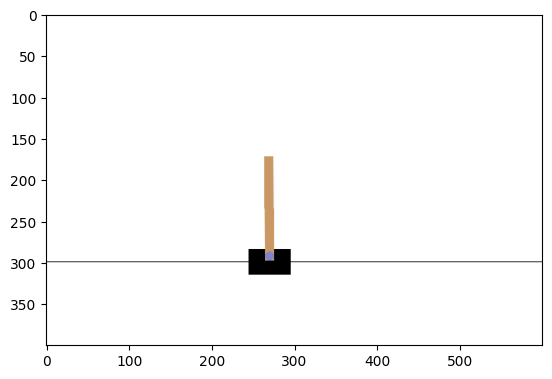

In [11]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython import display

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
        rgb_array = env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        plt.imshow(rgb_array)
        display.clear_output(wait = True)
        display.display(plt.gcf())
        choices.append(action)
        new_observation, reward, terminated, truncated, info = env.step(action)
        
        prev_obs = new_observation
        score+=reward
        if terminated:
            break

    env.reset()
    scores.append(score)

print(scores)
print('Average Score:',sum(scores)/len(scores))
print('choice 1:{}  choice 0:{}'.format(choices.count(1)/len(choices),choices.count(0)/len(choices)))

## DQN Cartpole

https://codetorial.net/articles/cartpole/first_training.html

In [1]:
import gymnasium as gym
import tensorflow as tf
import numpy as np
import random
from collections import deque

# Neural Network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(24, input_dim=4, activation=tf.nn.relu),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation='linear')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='mean_squared_error',
              )

score = []
memory = deque(maxlen=2000)

# CartPole 환경 구성
env = gym.make('CartPole-v1', render_mode='rgb_array')

2023-08-01 10:22:02.368942: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-08-01 10:22:05.034772: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-01 10:22:05.036336: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-08-01 10:22:05.066790: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-01 10:22:05.067032: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Laptop GPU computeCapability: 8.6
coreClock: 1.5GHz coreCount: 16 deviceMemorySize: 3.82GiB deviceMemoryBandwidth: 174.97GiB/s
2023-08-01 10:22:05.067047: I tensorflow/stream_executor/pl

In [3]:
# state = env.reset(seed=random.randint(0, 100))
state = env.reset()
print(state[0])
state = np.reshape(state[0], [1, 4])


[-0.0285058  -0.0114176  -0.00718355  0.01113431]


In [4]:

# 1000회의 에피소드 시작
for i in range(100):

    state = env.reset()
    state = np.reshape(state[0], [1, 4])

    eps = 1 / (i / 50 + 10)

    # 200 timesteps
    for t in range(200):

        # Inference: e-greedy
        if np.random.rand() < eps:
            action = np.random.randint(0, 2)
        else:
            predict = model.predict(state)
            action = np.argmax(predict)

        next_state, reward, done, _, _ = env.step(action)
        
        next_state = np.reshape(next_state, [1, 4])

        memory.append((state, action, reward, next_state, done))
        state = next_state

        if done or t == 199:
            print('Episode', i, 'Score', t + 1)
            score.append(t + 1)
            break

    # Training
    if i > 10:
        minibatch = random.sample(memory, 16)

        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + 0.9 * np.amax(model.predict(next_state)[0])
            target_outputs = model.predict(state)
            target_outputs[0][action] = target
            model.fit(state, target_outputs, epochs=1, verbose=0)

env.close()
print(score)

2023-08-01 10:22:45.059830: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-08-01 10:22:45.090101: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3293840000 Hz


Episode 0 Score 9
Episode 1 Score 10
Episode 2 Score 13
Episode 3 Score 23
Episode 4 Score 21
Episode 5 Score 9
Episode 6 Score 14
Episode 7 Score 21
Episode 8 Score 9
Episode 9 Score 62
Episode 10 Score 13
Episode 11 Score 16
Episode 12 Score 18
Episode 13 Score 9
Episode 14 Score 10
Episode 15 Score 12
Episode 16 Score 10
Episode 17 Score 11
Episode 18 Score 8
Episode 19 Score 9
Episode 20 Score 12
Episode 21 Score 9
Episode 22 Score 11
Episode 23 Score 10
Episode 24 Score 10
Episode 25 Score 10
Episode 26 Score 9
Episode 27 Score 9
Episode 28 Score 10
Episode 29 Score 8
Episode 30 Score 10
Episode 31 Score 9
Episode 32 Score 10
Episode 33 Score 12
Episode 34 Score 10
Episode 35 Score 9
Episode 36 Score 12
Episode 37 Score 10
Episode 38 Score 10
Episode 39 Score 8
Episode 40 Score 8
Episode 41 Score 16
Episode 42 Score 22
Episode 43 Score 13
Episode 44 Score 12
Episode 45 Score 9
Episode 46 Score 17
Episode 47 Score 13
Episode 48 Score 11
Episode 49 Score 9
Episode 50 Score 9
Episode

### DQN Cartpole
https://github.com/rlcode/reinforcement-learning-kr/blob/master/2-cartpole/1-dqn/cartpole_dqn.py

In [1]:
import sys
import gymnasium as gym
import pylab
import random
import numpy as np
from collections import deque
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

EPISODES = 300

2023-08-01 11:28:21.836510: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
# 카트폴 예제에서의 DQN 에이전트
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.render = False
        self.load_model = True

        # 상태와 행동의 크기 정의
        self.state_size = state_size
        self.action_size = action_size

        # DQN 하이퍼파라미터
        self.discount_factor = 0.99
        self.learning_rate = 0.001
        self.epsilon = 1.0
        self.epsilon_decay = 0.999
        self.epsilon_min = 0.01
        self.batch_size = 64
        self.train_start = 1000

        # 리플레이 메모리, 최대 크기 2000
        self.memory = deque(maxlen=2000)

        # 모델과 타깃 모델 생성
        self.model = self.build_model()
        self.target_model = self.build_model()

        # 타깃 모델 초기화
        self.update_target_model()

        if self.load_model:
            self.model.load_weights("./save_model/cartpole_dqn_trained.h5")
            print("load model in /save_model")

    # 상태가 입력, 큐함수가 출력인 인공신경망 생성
    def build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(24, activation='relu',
                        kernel_initializer='he_uniform'))
        model.add(Dense(self.action_size, activation='linear',
                        kernel_initializer='he_uniform'))
        model.summary()
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    # 타깃 모델을 모델의 가중치로 업데이트
    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    # 입실론 탐욕 정책으로 행동 선택
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            q_value = self.model.predict(state)
            return np.argmax(q_value[0])

    # 샘플 <s, a, r, s'>을 리플레이 메모리에 저장
    def append_sample(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    # 리플레이 메모리에서 무작위로 추출한 배치로 모델 학습
    def train_model(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        # 메모리에서 배치 크기만큼 무작위로 샘플 추출
        mini_batch = random.sample(self.memory, self.batch_size)

        states = np.zeros((self.batch_size, self.state_size))
        next_states = np.zeros((self.batch_size, self.state_size))
        actions, rewards, dones = [], [], []

        for i in range(self.batch_size):
            states[i] = mini_batch[i][0]
            actions.append(mini_batch[i][1])
            rewards.append(mini_batch[i][2])
            next_states[i] = mini_batch[i][3]
            dones.append(mini_batch[i][4])

        # 현재 상태에 대한 모델의 큐함수
        # 다음 상태에 대한 타깃 모델의 큐함수
        target = self.model.predict(states)
        target_val = self.target_model.predict(next_states)

        # 벨만 최적 방정식을 이용한 업데이트 타깃
        for i in range(self.batch_size):
            if dones[i]:
                target[i][actions[i]] = rewards[i]
            else:
                target[i][actions[i]] = rewards[i] + self.discount_factor * (
                    np.amax(target_val[i]))

        self.model.fit(states, target, batch_size=self.batch_size,
                       epochs=1, verbose=0)

2023-08-01 11:29:14.099996: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-01 11:29:14.100578: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-08-01 11:29:14.130876: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-01 11:29:14.131116: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Laptop GPU computeCapability: 8.6
coreClock: 1.5GHz coreCount: 16 deviceMemorySize: 3.82GiB deviceMemoryBandwidth: 174.97GiB/s
2023-08-01 11:29:14.131140: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-08-01 11:29:14.133401: I tensorflow/stream_executor/pl

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 50        
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                600       
____________________________________

2023-08-01 11:29:37.388040: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-08-01 11:29:37.410205: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3293840000 Hz


episode: 50   score: 21.0   memory length: 1004   epsilon: 0.995009990004999
episode: 51   score: 12.0   memory length: 1017   epsilon: 0.9821521870514506
episode: 52   score: 39.0   memory length: 1057   epsilon: 0.9436225637280606
episode: 53   score: 22.0   memory length: 1080   epsilon: 0.9221563184394991
episode: 54   score: 30.0   memory length: 1111   epsilon: 0.8939941590229386
episode: 55   score: 24.0   memory length: 1136   epsilon: 0.8719104583701925
episode: 56   score: 35.0   memory length: 1172   epsilon: 0.8410648110498392
episode: 57   score: 34.0   memory length: 1207   epsilon: 0.8121225152229574
episode: 58   score: 38.0   memory length: 1246   epsilon: 0.7810441642583167
episode: 59   score: 20.0   memory length: 1267   epsilon: 0.764805221953346
episode: 60   score: 29.0   memory length: 1297   epsilon: 0.7421906713080445
episode: 61   score: 43.0   memory length: 1341   epsilon: 0.7102266645246085
episode: 62   score: 63.0   memory length: 1405   epsilon: 0.66617

SystemExit: 

/home/jun/.conda/envs/Cartpole/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


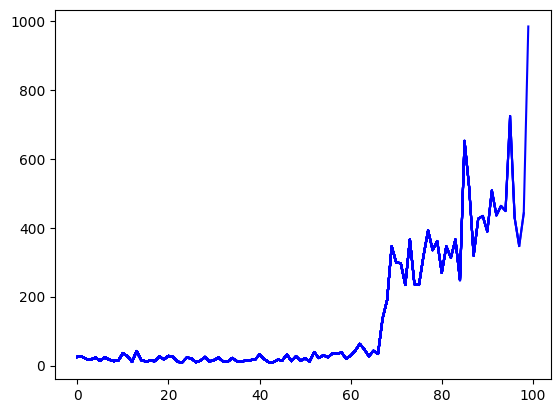

: 

In [4]:
if __name__ == "__main__":
    # CartPole-v1 환경, 최대 타임스텝 수가 500
    env = gym.make('CartPole-v1', render_mode='human')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    # DQN 에이전트 생성
    agent = DQNAgent(state_size, action_size)

    scores, episodes = [], []

    for e in range(EPISODES):
        done = False
        score = 0
        # env 초기화
        state = env.reset()
        state = np.reshape(state[0], [1, state_size])

        while not done:
            if agent.render:
                env.render()

            # 현재 상태로 행동을 선택
            action = agent.get_action(state)
            # 선택한 행동으로 환경에서 한 타임스텝 진행
            next_state, reward, done, truncated,info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            # 에피소드가 중간에 끝나면 -100 보상
            reward = reward if not done or score == 499 else -100

            # 리플레이 메모리에 샘플 <s, a, r, s'> 저장
            agent.append_sample(state, action, reward, next_state, done)
            # 매 타임스텝마다 학습
            if len(agent.memory) >= agent.train_start:
                agent.train_model()

            score += reward
            state = next_state

            if done:
                # 각 에피소드마다 타깃 모델을 모델의 가중치로 업데이트
                agent.update_target_model()

                score = score if score == 500 else score + 100
                # 에피소드마다 학습 결과 출력
                scores.append(score)
                episodes.append(e)
                pylab.plot(episodes, scores, 'b')
                pylab.savefig("./save_graph/cartpole_dqn.png")
                print("episode:", e, "  score:", score, "  memory length:",
                      len(agent.memory), "  epsilon:", agent.epsilon)

                # 이전 10개 에피소드의 점수 평균이 490보다 크면 학습 중단
                if np.mean(scores[-min(10, len(scores)):]) > 490:
                    agent.model.save_weights("./save_model/cartpole_dqn.h5")
                    sys.exit()

In [2]:
import gymnasium as gym
import numpy as np
import tensorflow as tf


# Cartpole 환경 설정
env = gym.make('CartPole-v1', render_mode='human')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# DQN 모델 생성과 가중치 불러오기
model = tf.keras.Sequential([
    tf.keras.layers.Dense(24, input_dim=state_size, activation='relu',
                          kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(24, activation='relu',
                          kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(action_size, activation='linear',
                          kernel_initializer='he_uniform')
])

model.load_weights('save_model/cartpole_dqn.h5')  # 모델의 가중치 파일을 불러옵니다.

# 학습 파라미터 설정
EPISODES = 10

# 예측 함수 정의
def predict_dqn():
    for episode in range(EPISODES):
        state = env.reset()
        state = np.reshape(state[0], [1, state_size])
        done = False
        total_reward = 0

        while not done:
            # DQN 모델로 행동 예측
            q_values = model.predict(state)
            action = np.argmax(q_values[0])

            next_state, reward, done, _, _ = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            total_reward += reward

            state = next_state

        print(f"Episode {episode}, Total Reward: {total_reward}")
    env.close()

predict_dqn()

2023-08-01 11:54:57.504245: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-01 11:54:57.505054: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-08-01 11:54:57.540314: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-01 11:54:57.540739: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Laptop GPU computeCapability: 8.6
coreClock: 1.5GHz coreCount: 16 deviceMemorySize: 3.82GiB deviceMemoryBandwidth: 174.97GiB/s
2023-08-01 11:54:57.540767: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-08-01 11:54:57.544387: I tensorflow/stream_executor/pl

Episode 0, Total Reward: 556.0
Episode 1, Total Reward: 609.0
Episode 2, Total Reward: 524.0
Episode 3, Total Reward: 915.0
Episode 4, Total Reward: 556.0
Episode 5, Total Reward: 460.0
Episode 6, Total Reward: 574.0
Episode 7, Total Reward: 480.0
Episode 8, Total Reward: 589.0
Episode 9, Total Reward: 961.0
